# exploring allosteric regulation by MD trajectory analysis 

## the logic and hypothesis of using RMSF explore allosteric regulation
The MWC and KNF model both suggest the two high/low affnity state of a protein/subunit. <br>
fluctuations of residues is decription of the 'state'. <br>
by comparing different binding, inhibition and their permutations. <br>
We can find the significant residues that related to the binding,permutation changes.

In [1]:
%pylab inline
import os
import numpy as np
from matplotlib import pyplot as plt
import pytraj as pt

Populating the interactive namespace from numpy and matplotlib


## rmsf analysis 

In [2]:
runs='1rubp_rep01'
traj_dir='/Volumes/zhili_8TB/new_model/'
traj_path='/'.join([traj_dir,runs])
os.chdir(traj_path+'/MMGBSA/')                       #cd the trajectory path

traj = pt.iterload('*strip.nc', '*strip.parm7',stride=1) #load the striped trajectory
#superpose the trajectory to the first frame
pt.superpose(traj, ref=0)                  
#do rmsf on the last 1/4 frames of the trajectory. show results by residue.
rmsf_list=pt.rmsf(traj= traj[int(len(traj)*0.75):],mask='byres')    

#The multimeric proteins with identical subunit are usually believed to have allosteric effect
#eight repeating large subunits here in rubisco 
for subunit in range(8):    
    rep_rmsf=rmsf_list[subunit*477:subunit*477+477].T[1]    #447 residues in a large subunit 
    if subunit==0:
        rmsf_stack=rep_rmsf
    else: 
        rmsf_stack=np.vstack((rmsf_stack,rep_rmsf))

### check the distrubution of the rmsf values 

mode:  0.56
mean:  0.958921934513412


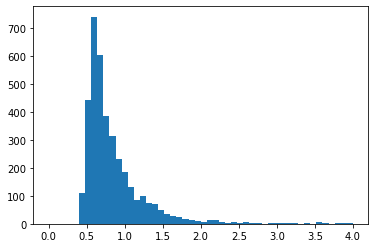

In [3]:
my_hist=hist(rmsf_stack.flatten(),bins=50,range=(0,4))
my_hist[1][np.where(my_hist[0])]

print('mode: ',my_hist[1][argmax(my_hist[0])])
print('mean: ',mean(rmsf_stack.flatten()))

ok most of residue's fluctuation is 0.56 A. 
The residues with high rmsf and large difference is of interest. 

### simple visualization of rmsf by residues. 

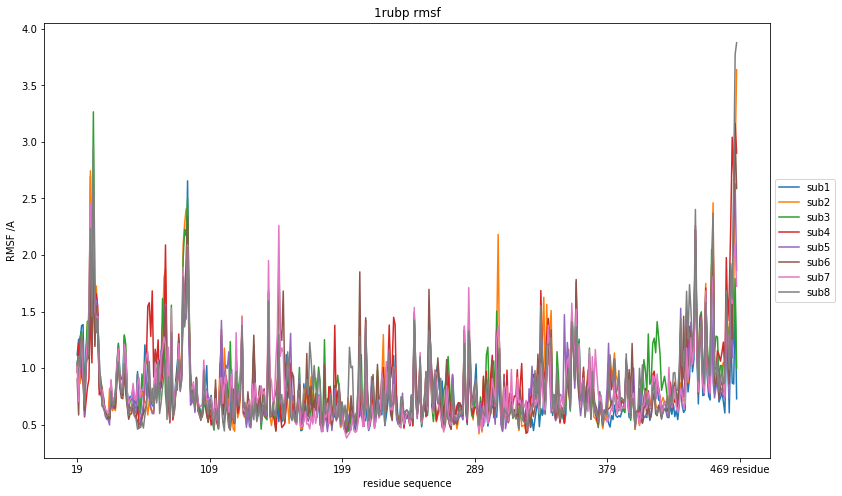

In [4]:
plt.figure(figsize = (13,8))
for i in range(8):

    plot(rmsf_stack[i][18:467],label='sub'+str(i+1))      
#do not visualize the head and tail residues, because they rmsf value and unlikely involves the allosteric regulation

plt.xticks(range(0,451,90),('19','109','199','289','379','469 residue'))
plt.xlabel('residue sequence')
plt.ylabel('RMSF /A')
plt.title('1rubp rmsf')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


The information contaions in the plot can be related to secondary structrues of the protein.
or the residue-residue contact relations.

### filter the data by large rmsf value

In [5]:
import pandas as pd
import seaborn as sns

In [6]:
sub_name=['L1','L2','L3','L4','L5','L6','L7','L8',]
df = pd.DataFrame(index=sub_name)
res_seq=array(range(1,478))

In [7]:
#find the max value per column, per repeating subunit
max_rmsf=np.max(rmsf_stack,axis=0)
var_rmsf=np.var(rmsf_stack,axis=0)

Text(0.5, 1, '1rubp rmsf')

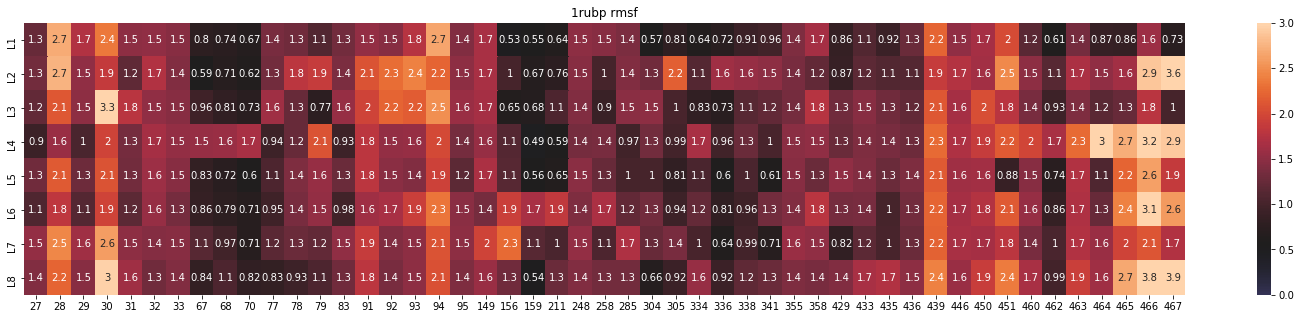

In [8]:
df1 = df.copy()
for res in res_seq[(var_rmsf>=0)&(max_rmsf>1.5)]:
    if int(res) > 18 and int(res) < 468:
        df1[int(res)]=rmsf_stack[:,int(res)-1]
plt.figure(figsize = (26,5))
sns.heatmap(df1,annot=True,vmax=3,vmin=0,center=0.56)
plt.title('1rubp rmsf')

the dataset becomes smaller, could we further filter it by (super)secondary structure?
residues on the helix, sheet, loops have different fluctuation... 

### introduce the contact map to the rmsf

### Introduction of allosteric network 
using the dynamic cross correlation matrix and contact map, <br>
to build a graph of protein.  <br>
analyse residue by current-flow centrality.  <br>

## MMPBSA, MMPBSA energy decomposition